# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [70]:
# Libraries
import numpy as np
# Your Code Here
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [71]:
# Matplotlib inline para visualizar los gráficos de Matplotlib
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'

In [72]:
# Configuración para setear y que todas las fig de Seaborn salgan por defecto con este tamaño
# Se puede especificar el tamaño de cada figura
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,4.)})
sns.set_style("whitegrid")

## Challenge 
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [73]:
fitbit = pd.read_csv('../data/Fitbit2.csv')

In [74]:
!pwd


/Users/awalsh/IRONHACK/lab-matplotlib-seaborn/your-code


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays?
**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

In [75]:
fitbit

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,2016-05-03,3796,18588,14.13,16,599.000,275,49,79,236,...,8.779972,Tuesday,1.0,1,6.283333,91.951220,5.233333,90.229885,May,5
363,2016-05-04,3525,16382,12.39,16,684.000,333,10,55,2075,...,7.698787,Wednesday,2.0,1,6.766667,95.081967,6.283333,91.951220,May,5
364,2016-05-05,3649,21913,16.40,19,701.000,287,29,90,2249,...,10.190484,Thursday,3.0,1,4.666667,88.888889,6.766667,95.081967,May,5
365,2016-05-06,3539,19023,14.79,15,575.000,298,8,85,2112,...,9.190077,Friday,4.0,1,6.166667,89.805825,4.666667,88.888889,May,5


In [76]:

pd.DataFrame(fitbit.groupby(["Months_encoded"])["Steps"].mean())
                                                      

,Steps
Months_encoded,
1,9892.064516
2,8922.866667
3,10312.935484
4,13079.033333
5,10620.096774
6,12536.166667
7,9193.322581
8,11584.774194
9,9191.333333


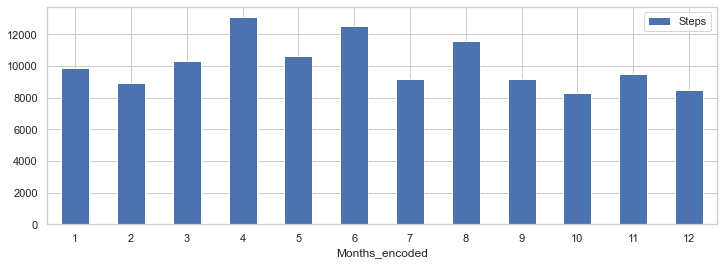

In [77]:
pd.DataFrame(fitbit.groupby(["Months_encoded"])["Steps"].mean()).plot(kind="bar")
plt.xticks(rotation=0);

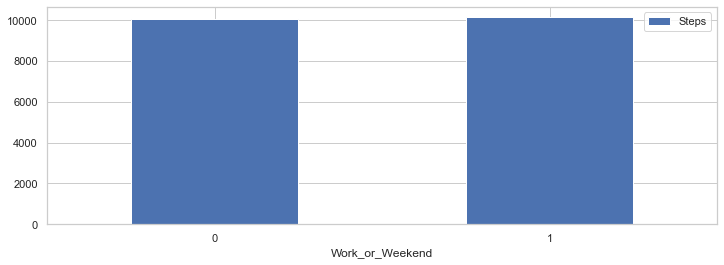

In [78]:
# AVERAGE STEPS BY WORK_OR_WEEKEND

pd.DataFrame(fitbit.groupby(["Work_or_Weekend"])["Steps"].mean()).plot(kind="bar")
plt.xticks(rotation=0);



#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

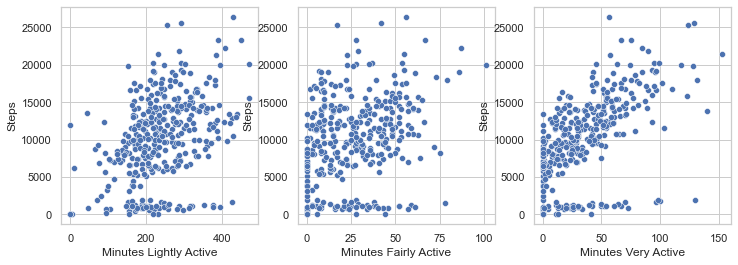

In [95]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12,4));

x = ["Minutes Lightly Active","Minutes Fairly Active","Minutes Very Active"]

for i in range(0,3):
    sns.scatterplot(data=fitbit, x = x[i], y="Steps", ax=axs[i])
    

<AxesSubplot:xlabel='Minutes Very Active', ylabel='Steps'>

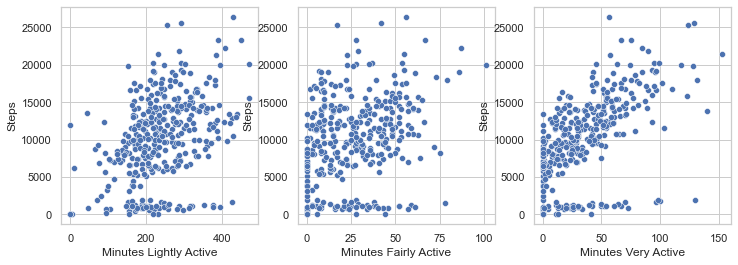

In [79]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12,4));
sns.scatterplot(data=fitbit, x="Minutes Lightly Active", y="Steps", ax=axs[0])
sns.scatterplot(data=fitbit, x="Minutes Fairly Active", y="Steps", ax=axs[1])
sns.scatterplot(data=fitbit, x="Minutes Very Active", y="Steps", ax=axs[2])

## Challenge 

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [80]:
titanic = pd.read_csv('../data/titanic.csv')

In [81]:
titanic

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,U0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,29.513190,0,0,A.5. 3236,8.0500,U0,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,U0,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,29.513190,0,0,359309,8.0500,U0,S


#### Explore the titanic dataset using Pandas dtypes.

In [82]:
titanic.dtypes

PassengerId      int64
Survived       float64
Pclass           int64
Name            object
Gender          object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [98]:
# NUMERICAL VARIABLES
titanic.select_dtypes(include=['float64','int64'])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0.0,3,22.000000,1,0,7.2500
1,2,1.0,1,38.000000,1,0,71.2833
2,3,1.0,3,26.000000,0,0,7.9250
3,4,1.0,1,35.000000,1,0,53.1000
4,5,0.0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
1304,1305,NaN,3,29.513190,0,0,8.0500
1305,1306,NaN,1,39.000000,0,0,108.9000
1306,1307,NaN,3,38.500000,0,0,7.2500
1307,1308,NaN,3,29.513190,0,0,8.0500


In [106]:
# CATEGORICAL VARIABLES
titanic.select_dtypes(include=["object"])
#We can asume that Name, Gender, Ticket, Cabin and Embarked are caterogical variables.


,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [125]:
import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')
sns.set(rc={"figure.figsize": (12.,6.)})

#### Use the right visulalization to show the distribution of column `Age`.

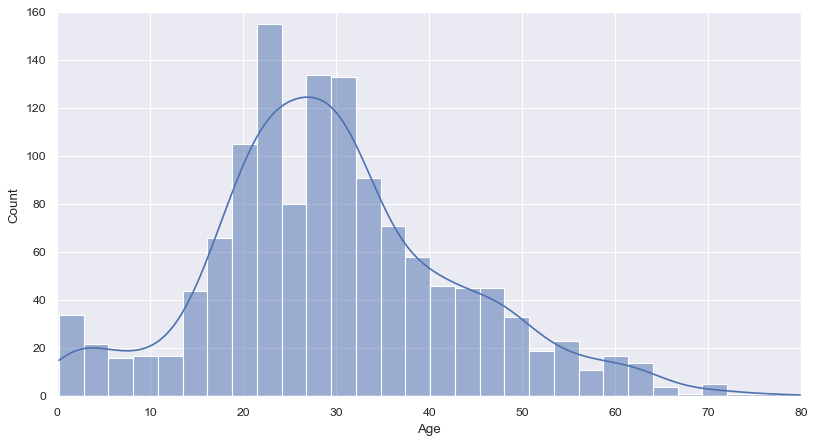

In [170]:
sns.histplot(x=titanic.Age, kde=True);

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

<AxesSubplot:xlabel='Age', ylabel='Count'>

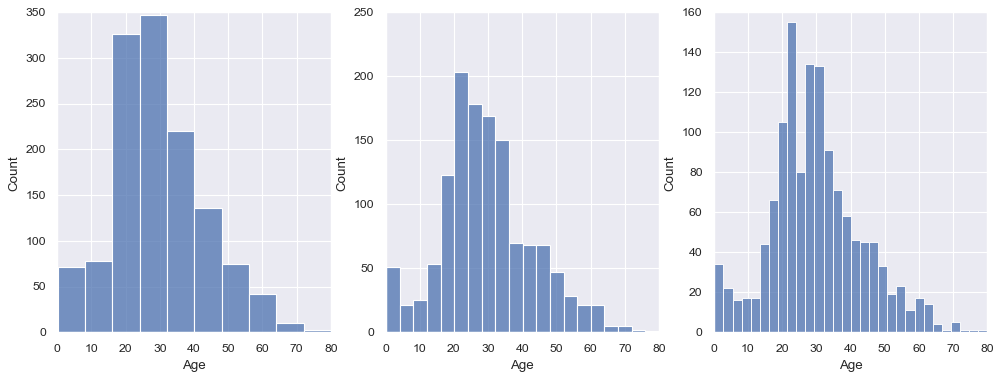

In [129]:

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
sns.histplot(x=titanic.Age, bins=10,ax=axs[0])
sns.histplot(x=titanic.Age, bins=20,ax=axs[1])
sns.histplot(x=titanic.Age, bins=30,ax=axs[2])


#### How does the bin size affect your plot?

In [ ]:
#As we increase the number of bins we can see more clearly how the age of the passengers is distributed.

#### Use seaborn to show the distribution of column `Age`.

<AxesSubplot:xlabel='Age', ylabel='Count'>

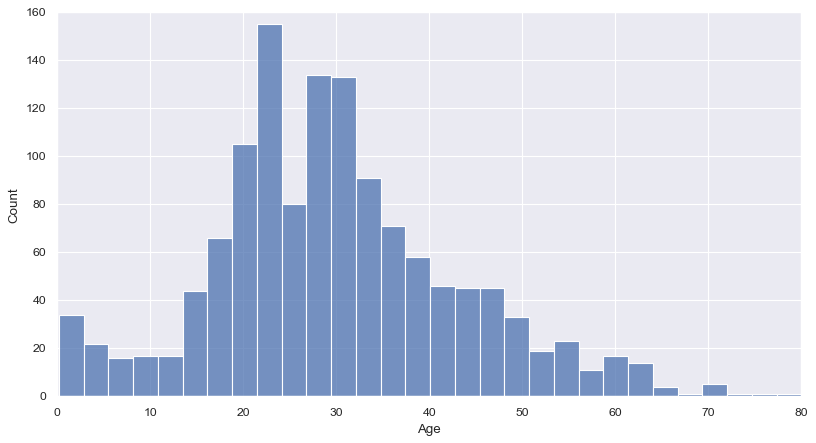

In [130]:
sns.histplot(x=titanic.Age)

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

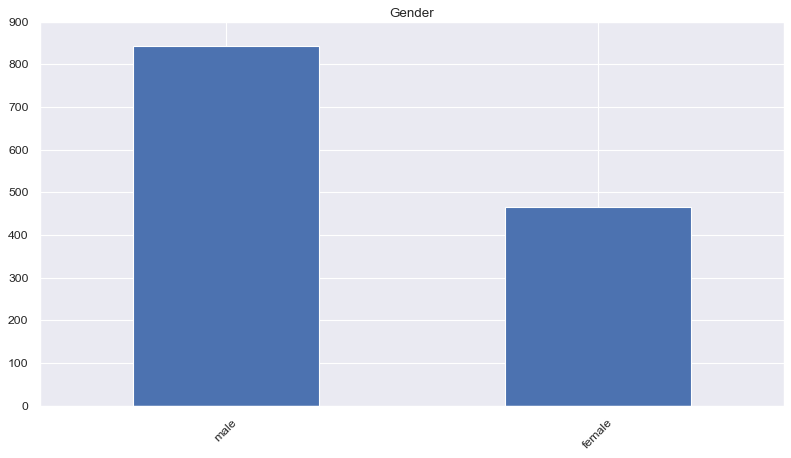

In [136]:
# Method 1 - matplotlib
titanic["Gender"].value_counts().plot(kind="bar", figsize=(12,6), title="Gender")
plt.xticks(rotation=45);

<AxesSubplot:xlabel='Gender', ylabel='count'>

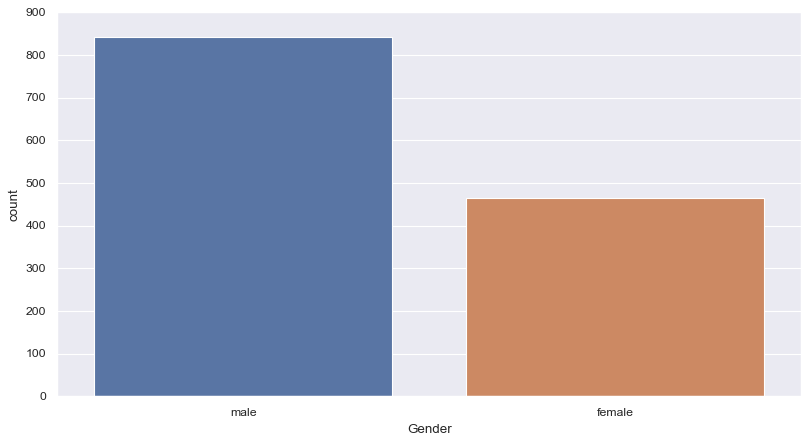

In [137]:
# Method 2 - seaborn
sns.countplot(x="Gender", data = titanic)

#### Use the right plot to visualize the column `Pclass`.

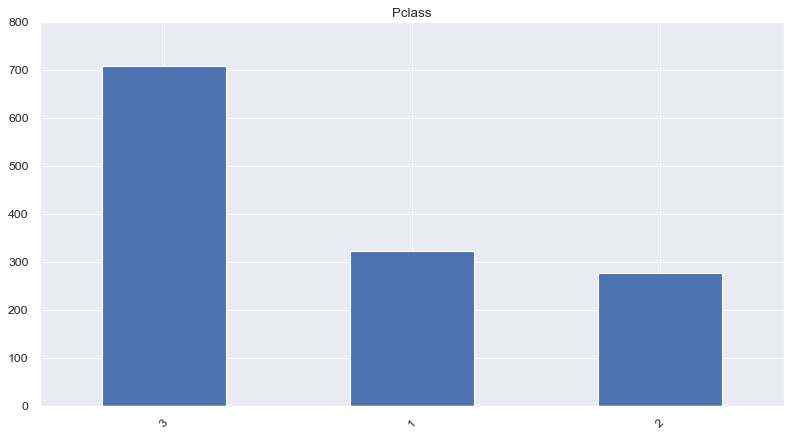

In [138]:
titanic["Pclass"].value_counts().plot(kind="bar", figsize=(12,6), title="Pclass")
plt.xticks(rotation=45);

<AxesSubplot:xlabel='Pclass', ylabel='Count'>

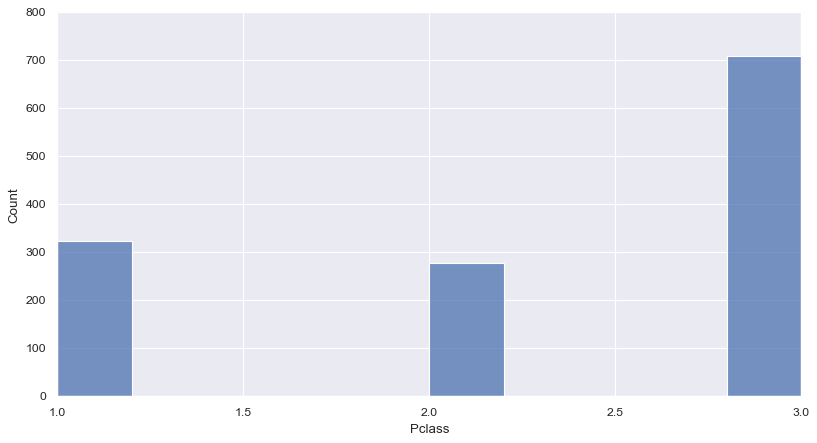

In [141]:
sns.histplot(data=titanic, x="Pclass",bins=10)

#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

<AxesSubplot:xlabel='Age'>

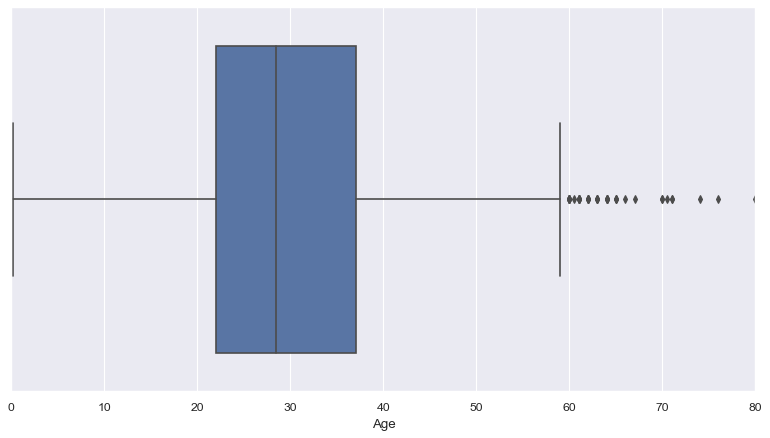

In [146]:

sns.boxplot(x="Age", data=titanic)

In [ ]:
#This plot shows the principal statistics of the variable age.

#### What does the last plot tell you about the feature `Age`?

In [ ]:
# The plot shows us that the median age of the passengers was around 28 years old and that most of them lay between Q2 y Q3.

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

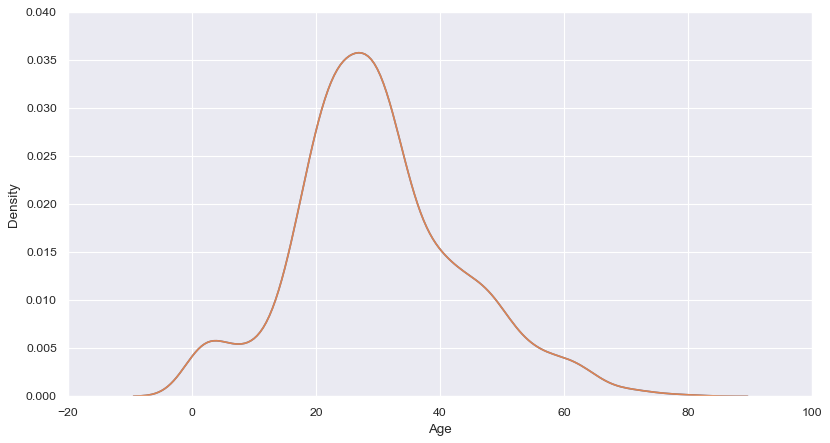

In [150]:
sns.kdeplot(x=titanic.Age)
kde = sns.kdeplot(x=titanic.Age)

TypeError: boxplot() got an unexpected keyword argument 'kde'

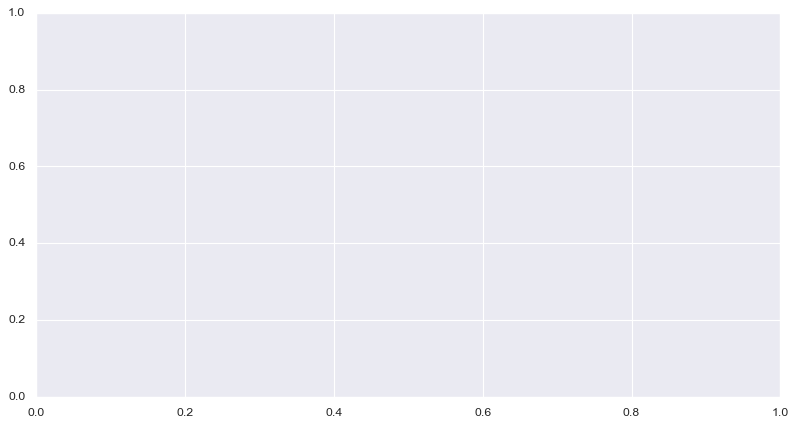

In [153]:

sns.boxplot(x="Age", data=titanic, kde = True)

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

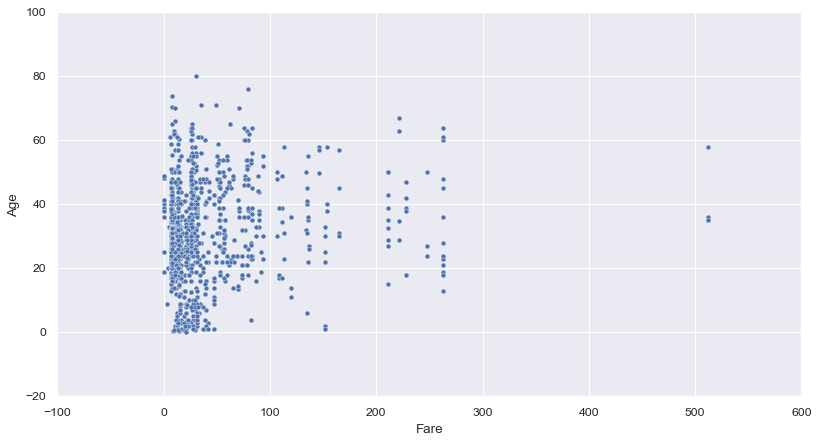

In [160]:
# Method 1 - matplotlib
sns.scatterplot(x="Fare", y="Age", data=titanic);


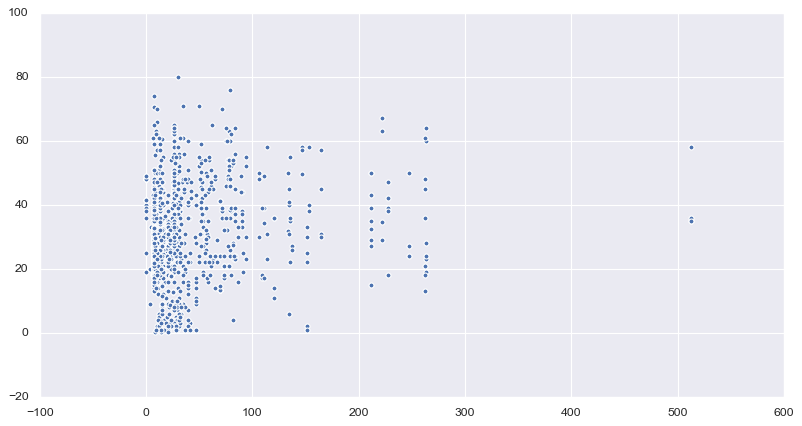

In [155]:
# Method 2 - seaborn
plt.scatter(x=titanic.Fare, y=titanic.Age)

#### Plot the correlation matrix using seaborn.

In [161]:
corr = titanic.corr()
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.025325,-0.055224,0.008942,0.031128
Survived,-0.005007,1.000000,-0.338481,-0.065376,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.425965,0.060832,0.018322,-0.558683
Age,0.025325,-0.065376,-0.425965,1.000000,-0.260706,-0.145488,0.171355
SibSp,-0.055224,-0.035322,0.060832,-0.260706,1.000000,0.373587,0.160349
Parch,0.008942,0.081629,0.018322,-0.145488,0.373587,1.000000,0.221635
Fare,0.031128,0.257307,-0.558683,0.171355,0.160349,0.221635,1.000000


#### What are the most correlated features?

In [ ]:
# The most positive correlated variables are: Parch-SibSp

# The most positive correlated variables are: Fare-Pclass




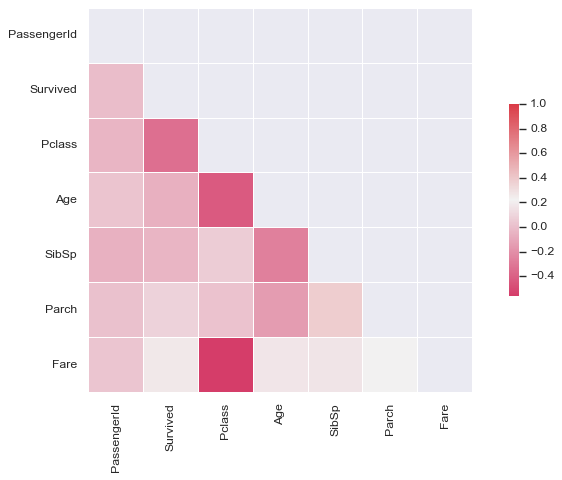

In [164]:
mascara = np.triu(np.ones_like(corr, dtype=bool)) # generamos la máscara para la triangular superior
color_map = sns.diverging_palette(0, 10, as_cmap=True) # paleta de colores
sns.heatmap(corr,  
            mask = mascara,
            cmap=color_map,
            square=True, #que los datos se vean como cuadrados
            linewidth=0.5, #ancho de línea
            vmax=1,
            cbar_kws={"shrink": .5} #barra lateral
           );

Use the most appropriate plot to display the summary statistics of Age depending on Pclass.

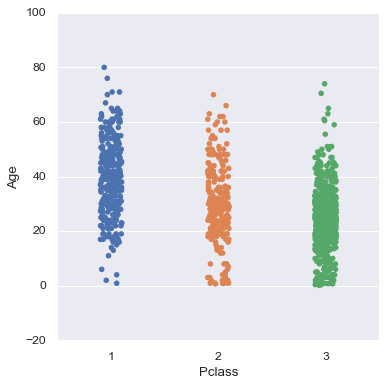

In [167]:
sns.catplot(x='Pclass', y='Age', data=titanic)

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

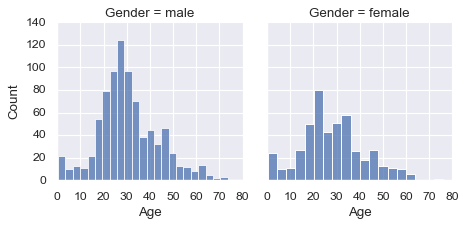

In [168]:
g = sns.FacetGrid(titanic, col='Gender')
g.map(sns.histplot, 'Age')